<a href="https://colab.research.google.com/github/Icetiger1/python/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%206_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
#preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   LabelEncoder,
                                   PowerTransformer) #powertransformer для трансвормации данных и приведения их к нормальному распределениею
from sklearn.model_selection import cross_val_score, RepeatedKFold #условия кросс валидации для стекинга
#regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor,
                              ExtraTreesRegressor,
                              GradientBoostingRegressor,
                              StackingRegressor)
from sklearn.tree import DecisionTreeRegressor



#metrics
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             r2_score)

#metrics

In [ ]:

def get_metrics_regression(model_list, model_list_names, X_test, y_test):
   #списки для метрик
    mean_absolute_error_list = []
    mean_absolute_percentage_error_list = []
    mean_squared_error_list = []
    r2_score_list = []
    for i in range(len(model_list)):
        y_pred = model_list[i].predict(X_test)
        #print(f'Для модели {model_list_names[i]}')
        MAE = mean_absolute_error(y_test, y_pred)
        mean_absolute_error_list.append(MAE)
        MAPE = mean_absolute_percentage_error(y_test, y_pred)
        mean_absolute_percentage_error_list.append(MAPE)
        MSE = mean_squared_error(y_test, y_pred)
        mean_squared_error_list.append(MSE)
        # r2 = r2_score(y_test, y_pred)
        # r2_score_list.append(r2)
    result_table = pd.DataFrame(index = model_list_names)
    result_table['MAE'] = mean_absolute_error_list
    result_table['MAPE'] = mean_absolute_percentage_error_list
    result_table['MSE'] = mean_squared_error_list
    # result_table['r2'] = r2_score_list

    return result_table




#загрузка данных

In [ ]:
!git clone https://github.com/Lasttrader/DA_repo

Cloning into 'DA_repo'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 63 (delta 1), reused 1 (delta 0), pack-reused 58
Receiving objects: 100% (63/63), 31.42 MiB | 13.69 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
path = '/content/DA_repo/Copy of Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv'

In [ ]:
data = pd.read_csv(path)
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [ ]:
data.info()

#Описательный анализ

In [ ]:
data.isna().sum().sum()

14219

<Axes: >

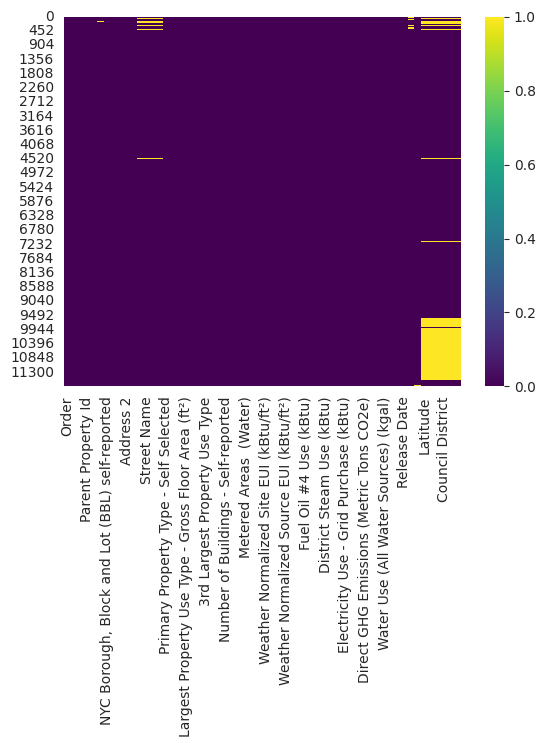

In [ ]:
sns.heatmap(data.isna(), cmap = 'viridis')


#Анализируем пропущенные значения (с учетом кодирования Not avaliable)

In [ ]:
#Заменяем значения на пропуски
data.replace({'Not Available' : np.nan}, inplace = True)

<Axes: >

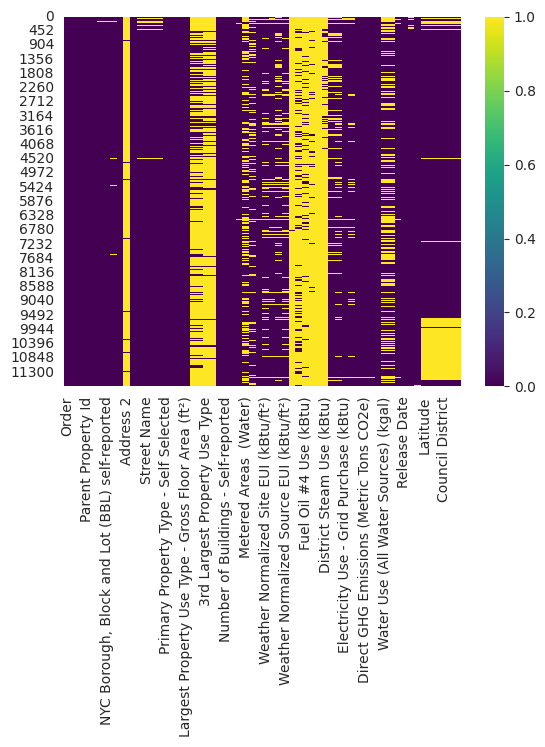

In [ ]:
sns.heatmap(data.isna(), cmap = 'viridis')

In [ ]:
#считаем пропуски, где больше 0
data_ = data.isna().sum() / len(data) * 100
data_.sort_values(ascending = False)

Fuel Oil #1 Use (kBtu)                                        99.923378
Diesel #2 Use (kBtu)                                          99.863783
Address 2                                                     98.237698
Fuel Oil #5 & 6 Use (kBtu)                                    94.942959
District Steam Use (kBtu)                                     92.031330
Fuel Oil #4 Use (kBtu)                                        88.753618
3rd Largest Property Use Type - Gross Floor Area (ft²)        87.365912
3rd Largest Property Use Type                                 87.365912
Fuel Oil #2 Use (kBtu)                                        78.026562
2nd Largest Property Use - Gross Floor Area (ft²)             68.150860
2nd Largest Property Use Type                                 68.150860
Metered Areas  (Water)                                        39.238890
Water Intensity (All Water Sources) (gal/ft²)                 33.917930
Water Use (All Water Sources) (kgal)                          33

In [ ]:
#Удаляем признаки, глде пропусков > 50%
cols_to_drop = data_[data_.values > 50].sort_values(ascending = False).index.to_list()
cols_to_drop
#data.drop(cols_to_drop, axis = 1, inplace = True)
data.isna().sum() / len(data) * 100

In [ ]:
data.drop('Order', axis = 1, inplace = True)
data.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,675,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,180,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,10032,3975,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,10032,161,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,10032,193,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


<Axes: >

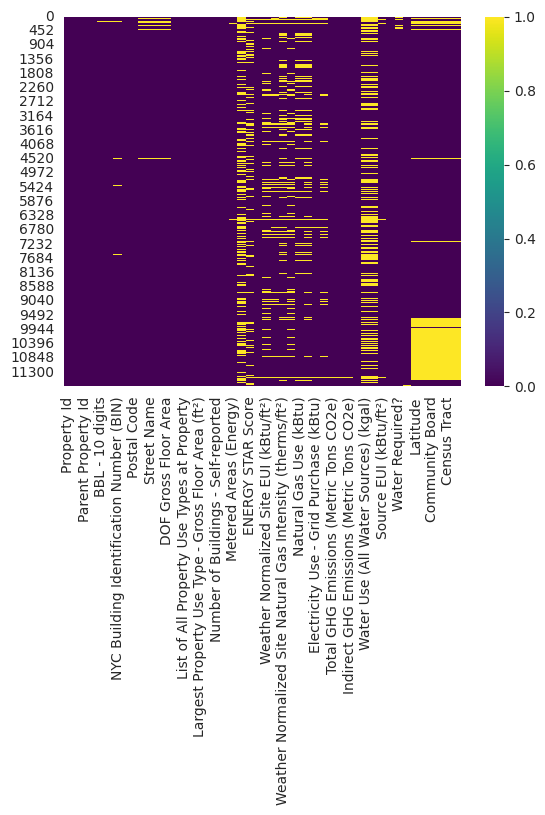

In [ ]:
sns.heatmap(data.isna(), cmap = 'viridis')

In [ ]:
for i in data.columns.to_list():
  try:
    data[i] = data[i].astype(float)
    print('УСПЕШНО для : ', i)
  except:
    print('ОШИБКА для : ',  i )

УСПЕШНО для :  Property Id
ОШИЬКА для :  Property Name
ОШИЬКА для :  Parent Property Id
ОШИЬКА для :  Parent Property Name
ОШИЬКА для :  BBL - 10 digits
ОШИЬКА для :  NYC Borough, Block and Lot (BBL) self-reported
ОШИЬКА для :  NYC Building Identification Number (BIN)
ОШИЬКА для :  Address 1 (self-reported)
ОШИЬКА для :  Postal Code
ОШИЬКА для :  Street Number
ОШИЬКА для :  Street Name
ОШИЬКА для :  Borough
УСПЕШНО для :  DOF Gross Floor Area
ОШИЬКА для :  Primary Property Type - Self Selected
ОШИЬКА для :  List of All Property Use Types at Property
ОШИЬКА для :  Largest Property Use Type
УСПЕШНО для :  Largest Property Use Type - Gross Floor Area (ft²)
УСПЕШНО для :  Year Built
УСПЕШНО для :  Number of Buildings - Self-reported
УСПЕШНО для :  Occupancy
ОШИЬКА для :  Metered Areas (Energy)
ОШИЬКА для :  Metered Areas  (Water)
УСПЕШНО для :  ENERGY STAR Score
УСПЕШНО для :  Site EUI (kBtu/ft²)
УСПЕШНО для :  Weather Normalized Site EUI (kBtu/ft²)
УСПЕШНО для :  Weather Normalized Site E

#Работаем с признаками

##Числовые признаки

In [ ]:
data.describe()

,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),...,Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,1.174600e+04,1.162800e+04,1.174400e+04,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,...,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,3.642958e+06,1.732695e+05,1.605524e+05,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,...,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,1.049070e+06,3.367055e+05,3.095746e+05,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,...,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,7.365000e+03,5.002800e+04,5.400000e+01,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,2.747222e+06,6.524000e+04,6.520100e+04,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,...,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,3.236404e+06,9.313850e+04,9.132400e+04,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,...,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,4.409092e+06,1.596140e+05,1.532550e+05,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,...,4.249000e+02,1.584140e+05,8.031875e+03,70.805000,162.750000,40.817623,-73.932443,9.000000,33.000000,531.500000
max,5.991312e+06,1.354011e+07,1.421712e+07,2019.000000,161.000000,100.000000,100.000000,869265.000000,939329.000000,6259.400000,...,4.764375e+06,1.421712e+07,6.594604e+06,96305.690000,912801.100000,40.912869,-73.715543,56.000000,51.000000,155101.000000


In [ ]:
num_cols = data.describe().columns.to_list()
num_data = data[num_cols]
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 28 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Property Id                                                 11746 non-null  float64
 1   DOF Gross Floor Area                                        11628 non-null  float64
 2   Largest Property Use Type - Gross Floor Area (ft²)          11744 non-null  float64
 3   Year Built                                                  11746 non-null  float64
 4   Number of Buildings - Self-reported                         11746 non-null  float64
 5   Occupancy                                                   11746 non-null  float64
 6   ENERGY STAR Score                                           9642 non-null   float64
 7   Site EUI (kBtu/ft²)                                         11583 non-null  float64
 

In [ ]:
#Заполняем пропуски для всех колонок, кроме целевой переменной
for i in num_data.drop('ENERGY STAR Score', axis = 1).columns.to_list():
  try:
    num_data[i] = num_data[i].fillna(data[i].mean())
    print(f'УСПЕШНО для {i}')
  except:
    print(f'ОШИБКА для {i}')

УСПЕШНО для Property Id
УСПЕШНО для DOF Gross Floor Area
УСПЕШНО для Largest Property Use Type - Gross Floor Area (ft²)
УСПЕШНО для Year Built
УСПЕШНО для Number of Buildings - Self-reported
УСПЕШНО для Occupancy
УСПЕШНО для Site EUI (kBtu/ft²)
УСПЕШНО для Weather Normalized Site EUI (kBtu/ft²)
УСПЕШНО для Weather Normalized Site Electricity Intensity (kWh/ft²)
УСПЕШНО для Weather Normalized Site Natural Gas Intensity (therms/ft²)
УСПЕШНО для Weather Normalized Source EUI (kBtu/ft²)
УСПЕШНО для Natural Gas Use (kBtu)
УСПЕШНО для Weather Normalized Site Natural Gas Use (therms)
УСПЕШНО для Electricity Use - Grid Purchase (kBtu)
УСПЕШНО для Weather Normalized Site Electricity (kWh)
УСПЕШНО для Total GHG Emissions (Metric Tons CO2e)
УСПЕШНО для Direct GHG Emissions (Metric Tons CO2e)
УСПЕШНО для Indirect GHG Emissions (Metric Tons CO2e)
УСПЕШНО для Property GFA - Self-Reported (ft²)
УСПЕШНО для Water Use (All Water Sources) (kgal)
УСПЕШНО для Water Intensity (All Water Sources) (gal/ft²)


<ipython-input-48-a0799d3e4fbc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].fillna(data[i].mean())


In [ ]:
num_data.isna().sum()

Property Id                                                      0
DOF Gross Floor Area                                             0
Largest Property Use Type - Gross Floor Area (ft²)               0
Year Built                                                       0
Number of Buildings - Self-reported                              0
Occupancy                                                        0
ENERGY STAR Score                                             2104
Site EUI (kBtu/ft²)                                              0
Weather Normalized Site EUI (kBtu/ft²)                           0
Weather Normalized Site Electricity Intensity (kWh/ft²)          0
Weather Normalized Site Natural Gas Intensity (therms/ft²)       0
Weather Normalized Source EUI (kBtu/ft²)                         0
Natural Gas Use (kBtu)                                           0
Weather Normalized Site Natural Gas Use (therms)                 0
Electricity Use - Grid Purchase (kBtu)                        

In [ ]:
num_data.shape

(11746, 28)

##Категориальные признаки

In [ ]:
data.describe(include = 'object')

,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Metered Areas (Energy),Metered Areas (Water),Release Date,Water Required?,DOF Benchmarking Submission Status,NTA
count,11746,11746,11746,11735,11735,11584,11746,11746,11622,11624,11628,11746,11746,11744,11689,7137,11746,11628,11716,9483
unique,11740,102,103,11580,11581,11507,11645,286,4198,2024,5,55,813,53,7,6,3537,2,1,144
top,Clinton West Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1019730001,1019730001,4455379,410 West 118th Street,10022,1,BROADWAY,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing,Whole Building,Whole Building,05/01/2017 02:58:14 PM,Yes,In Compliance,Midtown-Midtown South ...
freq,2,11324,11324,26,26,13,12,269,66,390,5176,8688,6182,8694,11648,7111,1258,7552,11716,720


In [ ]:
cat_cols_to_drop = ['Property Name', 'BBL - 10 digits', 'NYC Borough, Block and Lot (BBL) self-reported',
                    'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)']

In [ ]:
cat_cols = data.describe(include = 'object').columns.to_list()
cat_data = data[cat_cols].drop(cat_cols_to_drop, axis =1)
cat_data.head()

,Parent Property Id,Parent Property Name,Postal Code,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Metered Areas (Energy),Metered Areas (Water),Release Date,Water Required?,DOF Benchmarking Submission Status,NTA
0,13286,201/205,10017,675,3 AVENUE,Manhattan,Office,Office,Office,Whole Building,NaN,05/01/2017 05:32:03 PM,No,In Compliance,Turtle Bay-East Midtown ...
1,28400,NYP Columbia (West Campus),10032,180,FT WASHINGTON AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,Whole Building,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...
2,28400,NYP Columbia (West Campus),10032,3975,BROADWAY,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...
3,28400,NYP Columbia (West Campus),10032,161,FT WASHINGTON AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...
4,28400,NYP Columbia (West Campus),10032,193,FT WASHINGTON AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...


In [ ]:
cat_data.isna().sum()

Parent Property Id                               0
Parent Property Name                             0
Postal Code                                      0
Street Number                                  124
Street Name                                    122
Borough                                        118
Primary Property Type - Self Selected            0
List of All Property Use Types at Property       0
Largest Property Use Type                        2
Metered Areas (Energy)                          57
Metered Areas  (Water)                        4609
Release Date                                     0
Water Required?                                118
DOF Benchmarking Submission Status              30
NTA                                           2263
dtype: int64

In [ ]:
for i in list(cat_data.columns):
  print(f'для колонки {i} самоге частое значени  = ', cat_data[i].value_counts().index[0])


для колонки Parent Property Id самоге частое значени  =  Not Applicable: Standalone Property
для колонки Parent Property Name самоге частое значени  =  Not Applicable: Standalone Property
для колонки Postal Code самоге частое значени  =  10022
для колонки Street Number самоге частое значени  =  1
для колонки Street Name самоге частое значени  =  BROADWAY
для колонки Borough самоге частое значени  =  Manhattan
для колонки Primary Property Type - Self Selected самоге частое значени  =  Multifamily Housing
для колонки List of All Property Use Types at Property самоге частое значени  =  Multifamily Housing
для колонки Largest Property Use Type самоге частое значени  =  Multifamily Housing
для колонки Metered Areas (Energy) самоге частое значени  =  Whole Building
для колонки Metered Areas  (Water) самоге частое значени  =  Whole Building
для колонки Release Date самоге частое значени  =  05/01/2017 02:58:14 PM
для колонки Water Required? самоге частое значени  =  Yes
для колонки DOF Benchm

In [ ]:
#Заполняем пропуски для всех колонок, кроме целевой переменной
for i in cat_data.columns.to_list():
  try:
    cat_data[i] = cat_data[i].fillna(cat_data[i].value_counts().index[0])
    print(f'УСПЕШНО для {i}')
  except:
    print(f'ОШИБКА для {i}')

УСПЕШНО для Parent Property Id
УСПЕШНО для Parent Property Name
УСПЕШНО для Postal Code
УСПЕШНО для Street Number
УСПЕШНО для Street Name
УСПЕШНО для Borough
УСПЕШНО для Primary Property Type - Self Selected
УСПЕШНО для List of All Property Use Types at Property
УСПЕШНО для Largest Property Use Type
УСПЕШНО для Metered Areas (Energy)
УСПЕШНО для Metered Areas  (Water)
УСПЕШНО для Release Date
УСПЕШНО для Water Required?
УСПЕШНО для DOF Benchmarking Submission Status
УСПЕШНО для NTA


In [ ]:
cat_data.head()

,Parent Property Id,Parent Property Name,Postal Code,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Metered Areas (Energy),Metered Areas (Water),Release Date,Water Required?,DOF Benchmarking Submission Status,NTA
0,13286,201/205,10017,675,3 AVENUE,Manhattan,Office,Office,Office,Whole Building,Whole Building,05/01/2017 05:32:03 PM,No,In Compliance,Turtle Bay-East Midtown ...
1,28400,NYP Columbia (West Campus),10032,180,FT WASHINGTON AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,Whole Building,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...
2,28400,NYP Columbia (West Campus),10032,3975,BROADWAY,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,Whole Building,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...
3,28400,NYP Columbia (West Campus),10032,161,FT WASHINGTON AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,Whole Building,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...
4,28400,NYP Columbia (West Campus),10032,193,FT WASHINGTON AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,Whole Building,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...


###labelencoder

In [ ]:
le = LabelEncoder()
for i in cat_data.columns.to_list():
  cat_data[i] = le.fit_transform(cat_data[i].values)
cat_data.head()

,Parent Property Id,Parent Property Name,Postal Code,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Metered Areas (Energy),Metered Areas (Water),Release Date,Water Required?,DOF Benchmarking Submission Status,NTA
0,0,3,27,3402,123,2,26,669,24,6,5,2876,0,0,121
1,10,78,47,1100,1004,2,12,339,12,6,5,2323,0,0,128
2,10,78,47,2535,519,2,12,339,12,6,5,2323,0,0,128
3,10,78,47,909,1004,2,12,339,12,6,5,2323,0,0,128
4,10,78,47,1211,1004,2,12,339,12,6,5,2323,0,0,128


##Собираем общий датасет

In [ ]:
dataset = pd.concat([num_data, cat_data], axis = 1)
dataset.head()

,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),...,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Metered Areas (Energy),Metered Areas (Water),Release Date,Water Required?,DOF Benchmarking Submission Status,NTA
0,13286.0,289356.0,293447.0,1963.0,2.0,100.0,NaN,305.600000,303.100000,37.800000,...,2,26,669,24,6,5,2876,0,0,121
1,28400.0,3693539.0,3889181.0,1969.0,12.0,100.0,55.0,229.800000,228.800000,24.800000,...,2,12,339,12,6,5,2323,0,0,128
2,4778226.0,152765.0,231342.0,1924.0,1.0,100.0,NaN,280.071484,309.747466,11.072643,...,2,12,339,12,6,5,2323,0,0,128
3,4778267.0,891040.0,1305748.0,1971.0,1.0,100.0,NaN,280.071484,309.747466,11.072643,...,2,12,339,12,6,5,2323,0,0,128
4,4778288.0,211400.0,179694.0,1932.0,1.0,100.0,NaN,280.071484,309.747466,11.072643,...,2,12,339,12,6,5,2323,0,0,128


<Axes: >

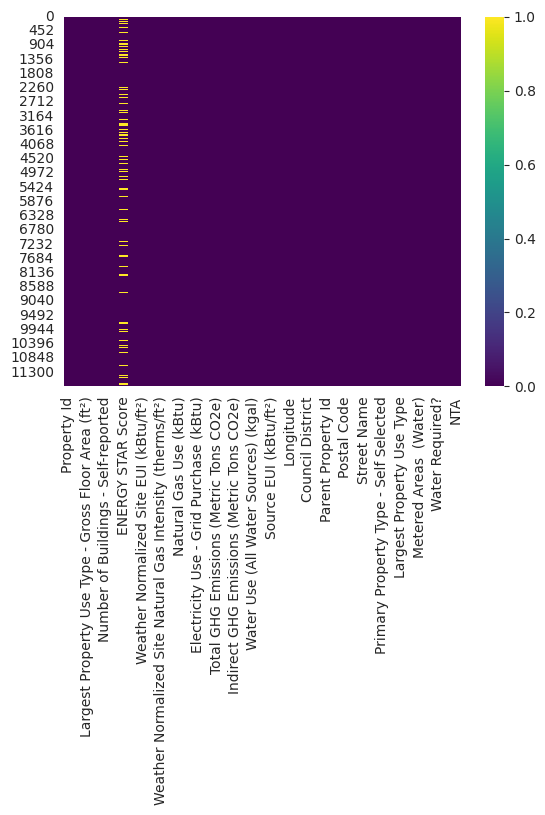

In [ ]:
sns.heatmap(dataset.isna(), cmap = 'viridis')

<Axes: >

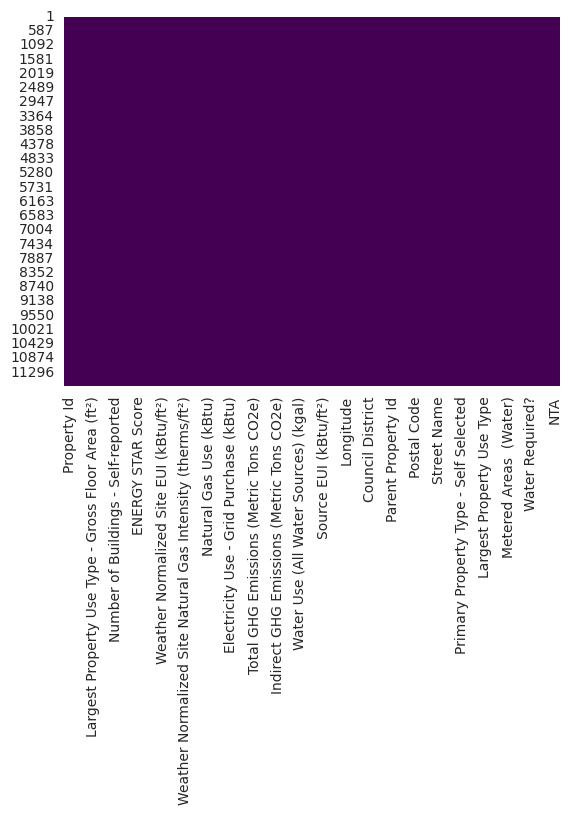

In [ ]:
dataset = dataset.dropna()
sns.heatmap(dataset.isna(), cmap = 'viridis', cbar = False)

#X y train_test_split

In [ ]:
y = np.array(dataset['ENERGY STAR Score'])
X = np.array(dataset.drop('ENERGY STAR Score', axis = 1))

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# y_scaled = scaler.fit_transform([y])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state= 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7713, 42)
(7713,)
(1929, 42)
(1929,)


#ML

#Regression

##Linear regression

In [ ]:
#инициализируем алгоритм ML
lr = LinearRegression()
#grid params
grid_params = {'fit_intercept' : [True, False]}

#grid search
grid_lr = GridSearchCV(lr,
                        grid_params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5)
#обучение сетки
grid_lr.fit(X_train, y_train)

print(f'лучшая точность = {grid_lr.best_score_}')
print(f'лучшая комбинация гиперпараметров = {grid_lr.best_params_}')
print(grid_lr.predict(X_test[:3]))
print(y_test[:3])

лучшая точность = -22.67754199902874
лучшая комбинация гиперпараметров = {'fit_intercept': True}
[80.05949836 58.02005813 50.72515783]
[100.  82.  60.]


##kNN regressor

In [ ]:
#инициализируем алгоритм ML
knnR = KNeighborsRegressor()
#grid params
grid_params = {'n_neighbors' : [8,9,10,15],
               'metric' : ['minkowski', 'manhattan']}
#grid search
grid_kNNR = GridSearchCV(knnR,
                        grid_params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5)
#обучение сетки
grid_kNNR.fit(X_train, y_train)

print(f'лучшая точность = {grid_kNNR.best_score_}')
print(f'лучшая комбинация гиперпараметров = {grid_kNNR.best_params_}')
print(grid_kNNR.predict(X_test[:3]))
print(y_test[:3])

лучшая точность = -22.93889258464443
лучшая комбинация гиперпараметров = {'metric': 'manhattan', 'n_neighbors': 10}
[59.8 73.2 36.7]
[100.  82.  60.]


##RandomForest Regressor

In [ ]:
#инициализируем алгоритм ML RandomForestClassifier
rfR = RandomForestRegressor()
#grid params
grid_params = {'criterion' : ['squared_error', 'absolute_error']}
              #  'n_estimators' : [45,50,55],
              #  'max_depth' : [5,6,7],
              #  'min_samples_split' : [2,3,4]}

#grid search
grid_rfR = GridSearchCV(rfR,
                        grid_params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5)
#обучение сетки
grid_rfR.fit(X_train[:100], y_train[:100])

print(f'лучшая точность = {grid_rfR.best_score_}')
print(f'лучшая комбинация гиперпараметров = {grid_rfR.best_params_}')
print(grid_rfR.predict(X_test[:3]))
print(y_test[:3])

лучшая точность = -14.256899999999998
лучшая комбинация гиперпараметров = {'criterion': 'squared_error'}
[80.02 66.33 70.  ]
[100.  82.  60.]


##Extra tree regressor

In [ ]:
#инициализируем алгоритм ML RandomForestClassifier
extratree = ExtraTreesRegressor()
#grid params
grid_params = {'criterion' : ['squared_error', 'absolute_error']}
              #  'n_estimators' : [45,50,55],
              #  'max_depth' : [5,6,7],
              #  'min_samples_split' : [2,3,4]}

#grid search
grid_extratree = GridSearchCV(extratree,
                        grid_params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5)
#обучение сетки
grid_extratree.fit(X_train[:100], y_train[:100])

print(f'лучшая точность = {grid_extratree.best_score_}')
print(f'лучшая комбинация гиперпараметров = {grid_extratree.best_params_}')
print(grid_extratree.predict(X_test[:3]))
print(y_test[:3])

лучшая точность = -14.631200000000002
лучшая комбинация гиперпараметров = {'criterion': 'absolute_error'}
[73.22 65.66 67.47]
[100.  82.  60.]


##Decision tree regressor

In [ ]:
#инициализируем алгоритм ML DecisionTreeClassifier
dtR = DecisionTreeRegressor()
#grid params
grid_params = {'criterion' : ['squared_error', 'absolute_error'],
               'max_depth' : [2,3],
               'min_samples_split' : [4,5]}

#grid search
grid_dtR = GridSearchCV(dtR,
                        grid_params,
                        scoring = 'accuracy',
                        cv = 5)
#обучение сетки
grid_dtR.fit(X_train, y_train)

print(f'лучшая точность = {grid_dtR.best_score_}')
print(f'лучшая комбинация гиперпараметров = {grid_dtR.best_params_}')
print(grid_dtR.predict(X_test[:3]))
print(y_test[:3])

#multitarget regression

In [ ]:
dataset.head()

,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),...,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Metered Areas (Energy),Metered Areas (Water),Release Date,Water Required?,DOF Benchmarking Submission Status,NTA
1,28400.0,3.693539e+06,3889181.0,1969.0,12.0,100.0,55.0,229.8,228.800000,24.8,...,2,12,339,12,6,5,2323,0,0,128
5,28402.0,2.230742e+06,2971874.0,1932.0,12.0,100.0,55.0,359.9,359.000000,8.3,...,2,12,339,12,6,5,2323,0,0,71
12,2637863.0,1.732695e+05,412503.0,1903.0,2.0,100.0,93.0,32.0,309.747466,7.5,...,2,23,586,21,6,5,2460,1,0,80
13,5871253.0,2.126560e+05,162656.0,1903.0,1.0,100.0,1.0,295.4,316.800000,5.8,...,1,23,618,21,6,5,2460,1,0,14
14,2777235.0,1.732695e+05,567517.0,1950.0,2.0,100.0,80.0,352.7,309.747466,32.2,...,2,12,339,12,6,5,1738,0,0,80


In [ ]:
ym = np.array(dataset[['ENERGY STAR Score', 'DOF Gross Floor Area']])
Xm = np.array(dataset.drop(['ENERGY STAR Score', 'DOF Gross Floor Area'], axis = 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xm, ym,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state= 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7713, 41)
(7713, 2)
(1929, 41)
(1929, 2)


##linear regression на multitarget

In [ ]:
#инициализируем алгоритм ML
lr = LinearRegression()
#grid params
grid_params = {'fit_intercept' : [True, False]}

#grid search
grid_lr = GridSearchCV(lr,
                        grid_params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5)
#обучение сетки
grid_lr.fit(X_train, y_train)

print(f'лучшая точность = {grid_lr.best_score_}')
print(f'лучшая комбинация гиперпараметров = {grid_lr.best_params_}')
print(grid_lr.predict(X_test[:3]))
print(y_test[:3])

лучшая точность = -19766.33436416006
лучшая комбинация гиперпараметров = {'fit_intercept': False}
[[7.99682775e+01 1.58707626e+05]
 [5.75915381e+01 7.70665545e+04]
 [5.03658555e+01 2.33043758e+05]]
[[1.00000e+02 1.74705e+05]
 [8.20000e+01 6.73470e+04]
 [6.00000e+01 2.14594e+05]]


#Ensembles

##gradient boosting regressor

In [ ]:
#GradientBoostingRegressor
gbr = GradientBoostingRegressor()

#параметры сетки
grid_params = {'loss' : ['squared_error', 'absolute_error'],
               'learning_rate' : [0.1, 0.05],
               'n_estimators' : [5,10]}

#grid search
grid_gbr = GridSearchCV(gbr,
                        grid_params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5)
#обучение сетки
grid_gbr.fit(X_train, y_train)

print(f'лучшая точность = {grid_gbr.best_score_}')
print(f'лучшая комбинация гиперпараметров = {grid_gbr.best_params_}')
print(grid_gbr.predict(X_test[:3]))
print(y_test[:3])

лучшая точность = -13.84576934837882
лучшая комбинация гиперпараметров = {'learning_rate': 0.1, 'loss': 'absolute_error', 'n_estimators': 10}
[85.0491826  62.23256185 58.39399014]
[100.  82.  60.]


##Stacking

In [ ]:
#стэкинг
def get_stacking():
  '''
  определяем слабые и мета модели
  '''
  stack = []
  stack.append(('knnr', KNeighborsRegressor()))
  stack.append(('extraTree', ExtraTreesRegressor()))
  stack.append(('lr', LinearRegression()))
  stack_meta = RandomForestRegressor() #мета модель
  model = StackingRegressor(estimators=stack, final_estimator=stack_meta, cv = 5)
  return model

def get_models():
  #словарь с моделями
  models = dict()
  models['knnr'] = KNeighborsRegressor()
  models['extraTree'] = ExtraTreesRegressor()
  models['lr'] = LinearRegression()
  models['stacking'] = get_stacking()
  return models

def get_evaluate(model, X_test, y_test):
  cv = RepeatedKFold(n_splits = 5,
                     n_repeats = 5,
                     random_state = 42) #условия обучения
  scores = cross_val_score(model,
                           X_test,
                           y_test,
                           scoring = 'neg_mean_absolute_error',
                           cv = cv)
  return scores

In [ ]:
models = get_models()
print(models)

{'knnr': KNeighborsRegressor(), 'extraTree': ExtraTreesRegressor(), 'lr': LinearRegression(), 'stacking': StackingRegressor(cv=5,
                  estimators=[('knnr', KNeighborsRegressor()),
                              ('extraTree', ExtraTreesRegressor()),
                              ('lr', LinearRegression())],
                  final_estimator=RandomForestRegressor())}


In [ ]:
#scores
scores_list = []
names_list = [] #именя моделей

for name, model in models.items():
  #print(name, models)
  scores = get_evaluate(model, X_test, y_test)
  scores_list.append(scores)
  names_list.append(name)
  print(f'ДЛя модели {name}, MAE = {np.mean(scores)}')

ДЛя модели knnr, MAE = -25.386030224525047
ДЛя модели extraTree, MAE = -10.923445398855785
ДЛя модели lr, MAE = -79.5898977754907
ДЛя модели stacking, MAE = -11.210840522452504


#Результирующая таблица

In [ ]:
model_list = [grid_lr,
              grid_extratree,
              grid_rfR]

model_names = ['grid_lr',
              'grid_extratree',
              'grid_rfR']

result_table = get_metrics_regression(model_list, model_names, X_test, y_test)
result_table

,MAE,MAPE,MSE
grid_lr,155.782671,136.116130,3.425913e+07
grid_extratree,14.264583,1.061730,3.436663e+02
grid_rfR,14.634095,1.049764,3.770038e+02
